In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from matplotlib.pyplot import figure

In [2]:
dataset=pd.read_csv("./g.csv",index_col="Date",parse_dates=True)

In [3]:
dataset.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03  326.796783  334.409424  326.511505  333.038025  333.038025   
2012-01-04  332.847839  335.460449  330.640656  334.474487  334.474487   
2012-01-05  331.396393  332.317322  328.443451  329.834839  329.834839   
2012-01-06  329.904907  330.330322  325.220215  325.335327  325.335327   
2012-01-09  323.573578  323.823822  310.925934  311.541534  311.541534   

              Volume  
Date                  
2012-01-03   7345647  
2012-01-04   5722272  
2012-01-05   6559234  
2012-01-06   5380414  
2012-01-09  11633555

In [4]:
dataset.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


<AxesSubplot:xlabel='Date'>

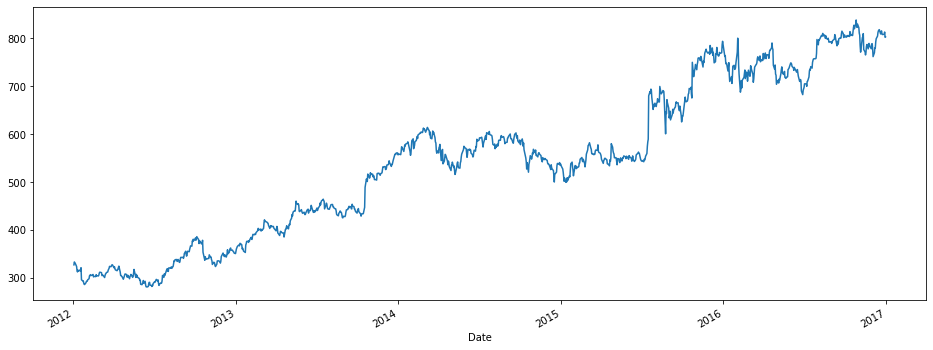

In [6]:
dataset["Open"].plot(figsize=(16,6))

In [7]:
dataset["Volume"]=dataset["Volume"].astype(float)

In [8]:
dataset.rolling(7).mean().head(20)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03         NaN         NaN         NaN         NaN         NaN   
2012-01-04         NaN         NaN         NaN         NaN         NaN   
2012-01-05         NaN         NaN         NaN         NaN         NaN   
2012-01-06         NaN         NaN         NaN         NaN         NaN   
2012-01-09         NaN         NaN         NaN         NaN         NaN   
2012-01-10         NaN         NaN         NaN         NaN         NaN   
2012-01-11  324.538823  326.938368  320.196629  322.771345  322.771345   
2012-01-12  322.985844  324.417271  318.346924  320.213789  320.213789   
2012-01-13  320.213789  321.321320  315.518380  317.118548  317.118548   
2012-01-17  318.058062  319.034031  313.334054  314.942801  314.942801   
2012-01-18  315.732880  317.175031  311.355647  313.719434  313.719434   
2012-01-19  315.338915  316.745318  312.087093  314.942801  314.942801   
2012-01-20  312.534681  313.685115  309.569576  312.286573  312.286573   
2012-01-23  309.853428  310.772919  306.855434  309.395107  309.395107   
2012-01-24  306.643075  307.540401  303.387678  305.912340  305.912340   
2012-01-25  303.157445  304.091239  299.478054  301.944087  301.944087   
2012-01-26  298.867440  299.979985  295.107252  297.619760  297.619760   
2012-01-27  294.874163  296.141859  291.332764  293.835262  293.835262   
2012-01-30  290.373945  291.781067  287.181471  289.410836  289.410836   
2012-01-31  289.835549  291.280566  286.713143  288.990413  288.990413   

                  Volume  
Date                      
2012-01-03           NaN  
2012-01-04           NaN  
2012-01-05           NaN  
2012-01-06           NaN  
2012-01-09           NaN  
2012-01-10           NaN  
2012-01-11  7.174104e+06  
2012-01-12  6.659962e+06  
2012-01-13  6.501064e+06  
2012-01-17  6.108999e+06  
2012-01-18  6.128637e+06  
2012-01-19  6.266413e+06  
2012-01-20  8.030561e+06  
2012-01-23  8.319672e+06  
2012-01-24  8.656649e+06  
2012-01-25  9.421712e+06  
2012-01-26  9.797593e+06  
2012-01-27  1.004186e+07  
2012-01-30  8.907341e+06  
2012-01-31  6.500065e+06

<AxesSubplot:xlabel='Date'>

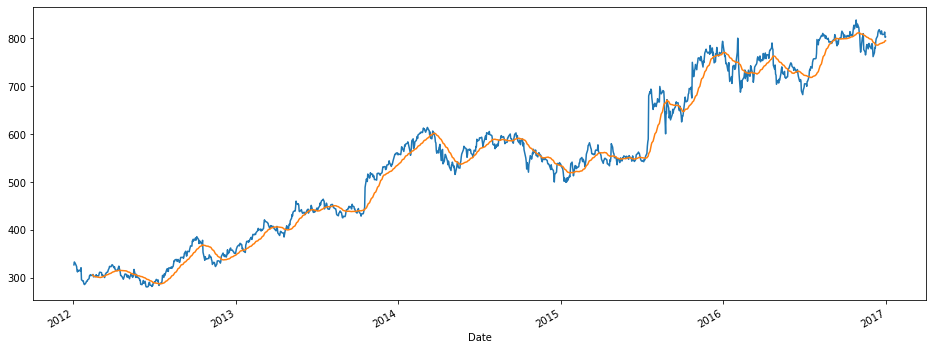

In [9]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

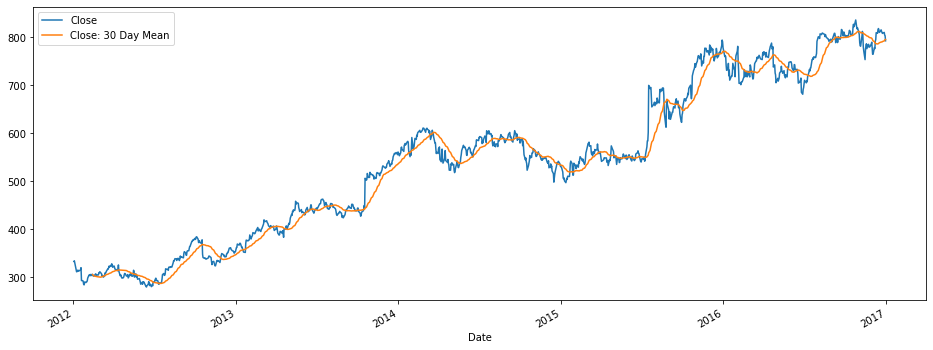

In [10]:
dataset['Close: 30 Day Mean']=dataset["Close"].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

In [11]:
train=dataset['Open']
train=pd.DataFrame(train)

In [12]:
dataset.isna().any()

Open                  False
High                  False
Low                   False
Close                 False
Adj Close             False
Volume                False
Close: 30 Day Mean     True
dtype: bool

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_set_scaled=sc.fit_transform(train)

In [14]:
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])
x_train, y_train=np.array(x_train),np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [15]:
#2nd Part
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [16]:
#regressor
r=Sequential()

In [17]:
r.add(LSTM(units=50,return_sequences=True, input_shape = (x_train.shape[1],1)))
r.add(Dropout(0.2))

r.add(LSTM(units=50,return_sequences=True))
r.add(Dropout(0.2))

r.add(LSTM(units=50,return_sequences=True))
r.add(Dropout(0.2))

r.add(LSTM(units=50))
r.add(Dropout(0.2))

r.add(Dense(units=1))

In [18]:
r.compile(optimizer='adam', loss= 'mean_squared_error')

r.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
38/38 [==============================] - 22s 100ms/step - loss: 0.0771
Epoch 2/10
38/38 [==============================] - 5s 143ms/step - loss: 0.0081
Epoch 3/10
38/38 [==============================] - 4s 114ms/step - loss: 0.0057
Epoch 4/10
38/38 [==============================] - 4s 112ms/step - loss: 0.0059
Epoch 5/10
38/38 [==============================] - 5s 119ms/step - loss: 0.0064 1s
Epoch 6/10
38/38 [==============================] - 4s 119ms/step - loss: 0.0054
Epoch 7/10
38/38 [==============================] - 4s 111ms/step - loss: 0.0045
Epoch 8/10
38/38 [==============================] - 4s 114ms/step - loss: 0.0047
Epoch 9/10
38/38 [==============================] - 4s 115ms/step - loss: 0.0050
Epoch 10/10
38/38 [==============================] - 4s 118ms/step - loss: 0.0044


In [19]:
test=pd.read_csv('./gogle.csv',index_col="Date",parse_dates=True)

In [33]:
real_stock=test.iloc[:,0].values
print(test.iloc[:,0])

0       800.619995
1       809.890015
2       807.500000
3       814.989990
4       826.369995
          ...     
246    1070.000000
247    1068.640015
248    1066.599976
249    1062.250000
250    1055.489990
Name: Open, Length: 251, dtype: float64


In [34]:
test.head()

Open        High         Low       Close   Adj Close     Volume  \
0  800.619995  811.440002  796.890015  808.010010  808.010010  1959000.0   
1  809.890015  813.429993  804.109985  807.770020  807.770020  1515300.0   
2  807.500000  813.739990  805.919983  813.020020  813.020020  1340500.0   
3  814.989990  828.960022  811.500000  825.210022  825.210022  2017100.0   
4  826.369995  830.429993  821.619995  827.179993  827.179993  1408900.0   

         Pred  
0  796.427429  
1  797.484253  
2  798.375122  
3  799.115906  
4  799.743958

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    float64
 6   Pred       251 non-null    float32
dtypes: float32(1), float64(6)
memory usage: 12.9 KB


In [36]:
test["Volume"]=test["Volume"].astype(float)

In [37]:
test_set=test['Open']
test_set=pd.DataFrame(test_set)

In [38]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    251 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [39]:
dataset_total=pd.concat((dataset['Open'],test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]

for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock=r.predict(x_test)
predicted_stock=sc.inverse_transform(predicted_stock)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       251 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


<AxesSubplot:>

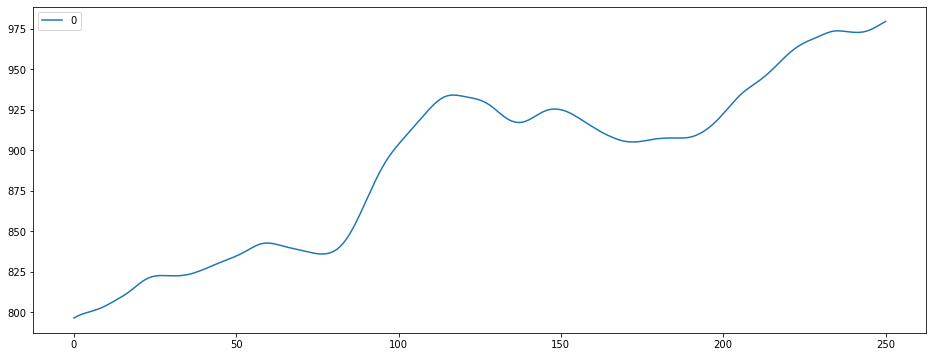

In [40]:
predicted_stock = pd.DataFrame(predicted_stock)
predicted_stock.info()
predicted_stock.plot(figsize=(16,6))

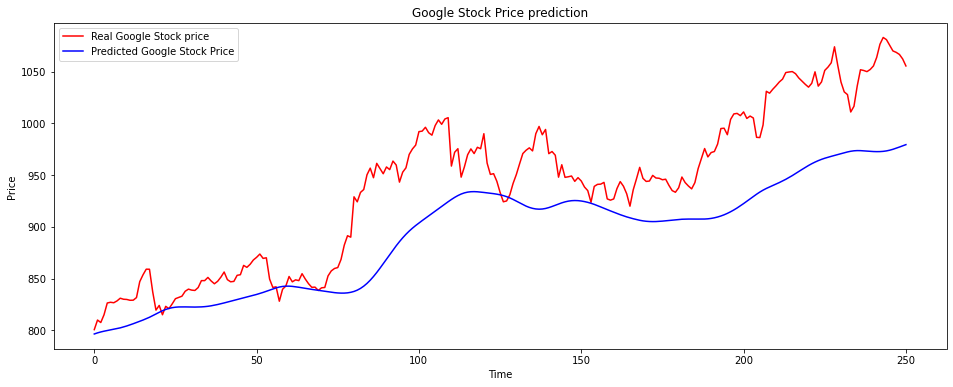

In [41]:
plt.figure(figsize=(16,6))
plt.plot(real_stock,color='red', label='Real Google Stock price')
plt.plot(predicted_stock,color='blue', label="Predicted Google Stock Price")
plt.title("Google Stock Price prediction")

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [42]:
test.reset_index(drop=True, inplace=True)
test["Pred"]=predicted_stock
test[["Close","Pred"]].head(20)

Close        Pred
0   808.010010  796.427429
1   807.770020  797.484253
2   813.020020  798.375122
3   825.210022  799.115906
4   827.179993  799.743958
5   826.010010  800.326538
6   829.859985  800.926880
7   829.530029  801.589111
8   830.940002  802.341309
9   827.460022  803.199463
10  829.020020  804.162598
11  824.369995  805.216614
12  828.169983  806.337708
13  844.429993  807.497559
14  849.530029  808.674194
15  858.450012  809.886658
16  856.979980  811.172302
17  845.030029  812.573303
18  823.830017  814.115356
19  820.190002  815.749023